# Nearest Neighbors Classification

revision: 78571a2

In [118]:
# @formatter:off
# PREAMBLE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from mlis.arrays import asinput, aslabel
%matplotlib inline
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
%load_ext autoreload
%autoreload 2
# @formatter:on

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


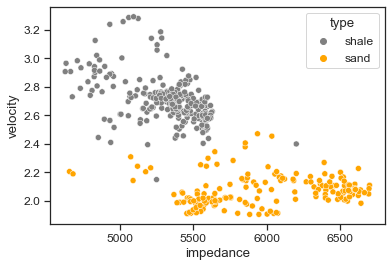

In [119]:
# load data
df = pd.read_csv('rocktypes.csv', sep=' ')
df['label'] = df['type'].apply(lambda string: -1 if string == 'sand' else +1)


def plot_fit(h=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.scatterplot(ax=ax, x='impedance', y='velocity', hue='type', data=df, palette=dict(sand='orange', shale='gray'))
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    scaler = preprocessing.StandardScaler().fit(df[['impedance', 'velocity']].values)
    if h:
        grid = 150
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], grid), np.linspace(ylim[0], ylim[1], grid))
        XY = np.array([np.ravel(xx), np.ravel(yy)]).T
        XY = scaler.transform(XY)
        P = h(XY).reshape(grid, grid)
        cn = ax.contour(xx, yy, P, colors='k', levels=10)
        ax.clabel(cn, inline=1, fontsize=10)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plot_fit()

In [123]:
# Open nearest_neighbors.py and implement the function knn_classify

from mlis.nonparametric.nearest_neighbors import knn_classify
from scipy.spatial.distance import cdist

k = 1
X = np.array([[1], [2], [3]])
y = np.array([5, -1, 3])
Z = np.array([[1], [3], [2]])
np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 1, cdist), [5., 3., -1.], decimal=3)
np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 2, cdist), [2., 1., 2.], decimal=3)
np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 3, cdist), [2.333, 2.333, 2.333], decimal=3)

Make predictions on the rock types data set for various values of k.
This should reproduce figure 7.4 on page 64

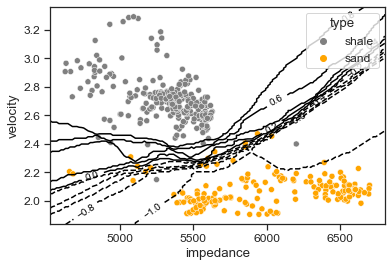

In [121]:
X = preprocessing.StandardScaler().fit_transform(asinput(df[['impedance', 'velocity']]))
y = aslabel(df['label'])
plot_fit(lambda Z: knn_classify(X, y, Z, 20, cdist))

*Task:* Use a different distance metric: Change the parameter "metric" from scipy.spatial.distance.cdist

In [124]:
# your code here
from functools import partial

X = np.array([[1], [2], [3]])
y = np.array([5, -1, 3])
Z = np.array([[1], [3], [2]])

for metric in ("sqeuclid", "hamming", "minkowski"):
    distance_function = partial(cdist, metric=metric)

    np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 1, distance_function), [5., 3., -1.], decimal=3)
    np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 2, distance_function), [2., 1., 2.], decimal=3)
    np.testing.assert_array_almost_equal(knn_classify(X, y, Z, 3, distance_function), [2.333, 2.333, 2.333], decimal=3)

# Nearest Neighbors Regression

Implement nearest neighbors regression. Reproduce figure 7.3 on page 64.

In [ ]:
# your code here

def plot_fit(X, y):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    sns.lmplot(x='temp', y='energy', data=df, fit_reg=False)
    ylim = plt.ylim()

    Z = np.linspace(df['temp'].min(), df['temp'].max(), 100)
    for i, k in enumerate((1, 100, 1000)):
        y_hat = np.squeeze(knn_classify(X, y, Z, k, cdist))
        plt.plot(Z, y_hat, colors[i+1], label='Prediction')
    plt.ylim(ylim)
    

# load data
df = pd.read_csv('energy.csv', sep=' ')
X = df["temp"]
y = df["energy"]

plot_fit(X, y)